C:\Users\Akitaka\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 15
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Akitaka\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 15
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Akitaka\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 15
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Akitaka\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 15
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Akitaka\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 16
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Akitaka\Anaconda3\lib

1 / 30
2 / 30
3 / 30
4 / 30
5 / 30
6 / 30
7 / 30
8 / 30
9 / 30
10 / 30
11 / 30
12 / 30
13 / 30
14 / 30
15 / 30
16 / 30
17 / 30
18 / 30
19 / 30
20 / 30
21 / 30
22 / 30
23 / 30
24 / 30
25 / 30
26 / 30
27 / 30
28 / 30
29 / 30
30 / 30


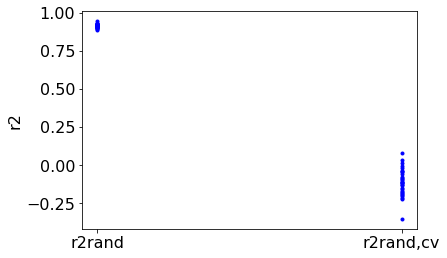

average: 0.9146620519445668, -0.1126675216009606


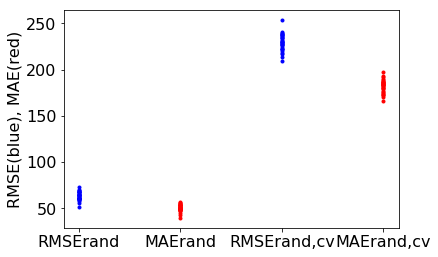

average: 63.41300615961631, 50.64211402223335, 229.37215452724664, 182.23275526680644

RMSEaverage: 217.6212381853929
MAEaverage: 172.19082685044265

r2: 0.9210500018365616
RMSE: 61.14730758009662
MAE: 50.53872750065907

r2cv: 0.0570411305538413
RMSEcv: 211.32343035895346
MAEcv: 167.86176272348942

r2p: 0.07378654882389224
RMSEp: 195.46337543855861
MAEp: 156.009941736286


In [1]:
# -*- coding: utf-8 -*- 
# %reset -f
"""
@author: Hiromasa Kaneko
"""
# Demonstration of y-randomization
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from y_rand_predict import y_rand_predict

# settings
number_of_training_samples = 100
number_of_test_samples = 10000
number_of_x_variables = 1000
number_of_y_randomization = 30
max_number_of_pls_components = 20
fold_number = 5

# generate sample dataset
x, y = datasets.make_regression(n_samples=number_of_training_samples + number_of_test_samples,
                                n_features=number_of_x_variables, n_informative=10, noise=30, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=number_of_test_samples, random_state=0)

# autoscaling
autoscaled_x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0, ddof=1)
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std(ddof=1)
autoscaled_x_test = (x_test - x_train.mean(axis=0)) / x_train.std(axis=0, ddof=1)

# modeling and prediction
pls_components = np.arange(1, min(np.linalg.matrix_rank(autoscaled_x_train) + 1, max_number_of_pls_components + 1), 1)
mae_all_cv = list()
for pls_component in pls_components:
    pls_model_in_cv = PLSRegression(n_components=pls_component)
    pls_model_in_cv.fit(autoscaled_x_train, autoscaled_y_train)
    calculated_y_in_cv = np.ndarray.flatten(pls_model_in_cv.predict(autoscaled_x_train))
    estimated_y_in_cv = np.ndarray.flatten(
        model_selection.cross_val_predict(pls_model_in_cv, autoscaled_x_train, autoscaled_y_train, cv=fold_number))
    calculated_y_in_cv = calculated_y_in_cv * y_train.std(ddof=1) + y_train.mean()
    estimated_y_in_cv = estimated_y_in_cv * y_train.std(ddof=1) + y_train.mean()
    mae_all_cv.append(float(sum(abs(y_train - estimated_y_in_cv)) / len(y_train)))
optimal_pls_component_number = np.where(mae_all_cv == np.min(mae_all_cv))
optimal_pls_component_number = optimal_pls_component_number[0][0] + 1
regression_model = PLSRegression(n_components=optimal_pls_component_number)
regression_model.fit(autoscaled_x_train, autoscaled_y_train)
estimated_y_train = np.ndarray.flatten(regression_model.predict(autoscaled_x_train))
estimated_y_train = estimated_y_train * y_train.std(ddof=1) + y_train.mean()
estimated_y_train_cv = np.ndarray.flatten(
    model_selection.cross_val_predict(regression_model, autoscaled_x_train, autoscaled_y_train, cv=fold_number))
estimated_y_train_cv = estimated_y_train_cv * y_train.std(ddof=1) + y_train.mean()
predicted_y_test = np.ndarray.flatten(regression_model.predict(autoscaled_x_test))
predicted_y_test = predicted_y_test * y_train.std(ddof=1) + y_train.mean()

# y-randomization
statistics_yrand = np.empty([number_of_y_randomization, 6])
for y_rand_num in range(number_of_y_randomization):
    print('{0} / {1}'.format(y_rand_num + 1, number_of_y_randomization))
    mae_all_cv = list()
    for pls_component in pls_components:
        pls_model_in_cv = PLSRegression(n_components=pls_component)
        y_train_rand, estimated_y_train_rand, estimated_y_in_cv = y_rand_predict(regression_model, x_train, y_train, fold_number, y_rand_num)
        mae_all_cv.append(float(sum(abs(y_train_rand - estimated_y_in_cv)) / len(y_train)))
    optimal_pls_component_number_rand = np.where(mae_all_cv == np.min(mae_all_cv))
    optimal_pls_component_number_rand = optimal_pls_component_number_rand[0][0] + 1
    regression_model = PLSRegression(n_components=optimal_pls_component_number_rand)
    
    y_train_rand, estimated_y_train_rand, estimated_y_train_in_cv_rand = y_rand_predict(regression_model, x_train, y_train, fold_number, y_rand_num)

    statistics_yrand[y_rand_num, 0] = float(
        1 - sum((y_train_rand - estimated_y_train_rand) ** 2) / sum((y_train_rand - y_train.mean()) ** 2))
    statistics_yrand[y_rand_num, 1] = float((sum((y_train_rand - estimated_y_train_rand) ** 2) / len(y_train)) ** 0.5)
    statistics_yrand[y_rand_num, 2] = float(sum(abs(y_train_rand - estimated_y_train_rand)) / len(y_train))
    statistics_yrand[y_rand_num, 3] = float(
        1 - sum((y_train_rand - estimated_y_train_in_cv_rand) ** 2) / sum((y_train_rand - y_train.mean()) ** 2))
    statistics_yrand[y_rand_num, 4] = float((sum((y_train_rand - estimated_y_train_in_cv_rand) ** 2) / len(y_train)) ** 0.5)
    statistics_yrand[y_rand_num, 5] = float(sum(abs(y_train_rand - estimated_y_train_in_cv_rand)) / len(y_train))

# results
plt.rcParams["font.size"] = 16
plt.plot(np.ones(number_of_y_randomization), statistics_yrand[:, 0], 'b.')
plt.plot(np.ones(number_of_y_randomization) * 2, statistics_yrand[:, 3], 'b.')
plt.xticks([1, 2], ['r2rand', 'r2rand,cv'])
plt.ylabel('r2')
plt.show()
print('average: {0}, {1}'.format(statistics_yrand[:, 0].mean(), statistics_yrand[:, 3].mean()))

plt.plot(np.ones(number_of_y_randomization), statistics_yrand[:, 1], 'b.')
plt.plot(np.ones(number_of_y_randomization) * 2, statistics_yrand[:, 2], 'r.')
plt.plot(np.ones(number_of_y_randomization) * 3, statistics_yrand[:, 4], 'b.')
plt.plot(np.ones(number_of_y_randomization) * 4, statistics_yrand[:, 5], 'r.')
plt.xticks([1, 2, 3, 4], ['RMSErand', 'MAErand', 'RMSErand,cv', 'MAErand,cv'])
plt.ylabel('RMSE(blue), MAE(red)')
plt.show()
print('average: {0}, {1}, {2}, {3}'.format(statistics_yrand[:, 1].mean(), statistics_yrand[:, 2].mean(),
                                           statistics_yrand[:, 4].mean(), statistics_yrand[:, 5].mean()))

print('')
print('RMSEaverage: {0}'.format(float((sum((y_train - y_train.mean()) ** 2) / len(y_train)) ** 0.5)))
print('MAEaverage: {0}'.format(float(sum(abs(y_train - y_train.mean())) / len(y_train))))
print('')
print('r2: {0}'.format(float(1 - sum((y_train - estimated_y_train) ** 2) / sum((y_train - y_train.mean()) ** 2))))
print('RMSE: {0}'.format(float((sum((y_train - estimated_y_train) ** 2) / len(y_train)) ** 0.5)))
print('MAE: {0}'.format(float(sum(abs(y_train - estimated_y_train)) / len(y_train))))
print('')
print('r2cv: {0}'.format(float(1 - sum((y_train - estimated_y_train_cv) ** 2) / sum((y_train - y_train.mean()) ** 2))))
print('RMSEcv: {0}'.format(float((sum((y_train - estimated_y_train_cv) ** 2) / len(y_train)) ** 0.5)))
print('MAEcv: {0}'.format(float(sum(abs(y_train - estimated_y_train_cv)) / len(y_train))))
print('')
print('r2p: {0}'.format(float(1 - sum((y_test - predicted_y_test) ** 2) / sum((y_test - y_test.mean()) ** 2))))
print('RMSEp: {0}'.format(float((sum((y_test - predicted_y_test) ** 2) / len(y_test)) ** 0.5)))
print('MAEp: {0}'.format(float(sum(abs(y_test - predicted_y_test)) / len(y_test))))
